##Importing Libraries

In [251]:
import statistics
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Reading the Files into DataFrames

In [22]:
areas= pd.read_csv('/content/drive/MyDrive/Simprints/areas.csv')
visits= pd.read_csv('/content/drive/MyDrive/Simprints/visits.csv')

In [5]:
areas.head()

,Beneficiary,Area
0,beneficiary_8635,DISTRICT_1
1,beneficiary_16804,district_1
2,beneficiary_15584,District_1
3,beneficiary_19507,District_1
4,beneficiary_5733,DISTRICT_1


In [13]:
visits.head()

,Date,Type,Beneficiary
0,2020-01-02,Home,beneficiary_17268
1,2020-01-02,Clinic,beneficiary_19126
2,2020-01-02,Home,beneficiary_19521
3,2020-01-02,Clinic,beneficiary_3399
4,2020-01-02,Clinic,beneficiary_18881


In [44]:
users= pd.read_csv('/content/drive/MyDrive/Simprints/users.txt', sep=' ', header=None)

In [45]:
users.head()

,0,1
0,user_47:,"beneficiary_8635,beneficiary_16804,beneficiary..."
1,user_21:,"beneficiary_4371,beneficiary_5713,beneficiary_..."
2,user_40:,"beneficiary_14563,beneficiary_11286,beneficiar..."
3,user_52:,"beneficiary_1014,beneficiary_344,beneficiary_6..."
4,user_38:,"beneficiary_14312,beneficiary_22460,beneficiar..."


In [38]:
area_ben= set(areas['Beneficiary'])
print(len(area_ben))
visits_ben= set(visits['Beneficiary'])
print(len(visits_ben))
total_ben= area_ben.union(visits_ben)
print(len(total_ben))

22701
22044
22701


In [59]:
total_ben= list(total_ben)

In [69]:
bens=[]
user_ids=[]
for i in range(users.shape[0]):
    user_ids.append((users.iloc[i,0]).replace(':',''))
    bens.append(users.iloc[i,1].split(','))
user_dict= dict(zip(user_ids,bens))

In [125]:
users_df= pd.DataFrame(total_ben)
users_df.rename(columns={0:'Beneficiary'}, inplace= True)
for i in range(len(user_ids)):
    users_df[i]= np.zeros(users_df.shape[0])
users_df.head()

,Beneficiary,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,beneficiary_21815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,beneficiary_8957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,beneficiary_6989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,beneficiary_12459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,beneficiary_16483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
col_names= ['Beneficiary']
col_names.extend(user_ids)
users_df.columns= col_names
users_df.head()

,Beneficiary,user_47,user_21,user_40,user_52,user_38,user_44,user_71,user_15,user_2,user_24,user_57,user_42,user_70,user_72,user_63,user_4,user_25,user_41,user_5,user_37,user_62,user_26,user_56,user_69,user_45,user_58,user_11,user_49,user_29,user_30,user_35,user_22,user_65,user_17,user_1,user_20,user_54,user_6,user_9,user_36,user_3,user_12,user_48,user_46,user_59,user_13,user_14,user_39,user_8,user_33,user_7,user_55,user_27,user_61,user_31,user_34,user_16,user_53,user_67,user_43,user_60,user_66,user_18,user_19,user_23,user_64,user_28,user_10,user_50,user_32,user_68,user_51
0,beneficiary_21815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,beneficiary_8957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,beneficiary_6989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,beneficiary_12459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,beneficiary_16483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
users_df.tail()

,Beneficiary,user_47,user_21,user_40,user_52,user_38,user_44,user_71,user_15,user_2,user_24,user_57,user_42,user_70,user_72,user_63,user_4,user_25,user_41,user_5,user_37,user_62,user_26,user_56,user_69,user_45,user_58,user_11,user_49,user_29,user_30,user_35,user_22,user_65,user_17,user_1,user_20,user_54,user_6,user_9,user_36,user_3,user_12,user_48,user_46,user_59,user_13,user_14,user_39,user_8,user_33,user_7,user_55,user_27,user_61,user_31,user_34,user_16,user_53,user_67,user_43,user_60,user_66,user_18,user_19,user_23,user_64,user_28,user_10,user_50,user_32,user_68,user_51
22696,beneficiary_9016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22697,beneficiary_16383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22698,beneficiary_22380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22699,beneficiary_19744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22700,beneficiary_5646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
users_df.set_index('Beneficiary', inplace=True)
users_df.head()

,user_47,user_21,user_40,user_52,user_38,user_44,user_71,user_15,user_2,user_24,user_57,user_42,user_70,user_72,user_63,user_4,user_25,user_41,user_5,user_37,user_62,user_26,user_56,user_69,user_45,user_58,user_11,user_49,user_29,user_30,user_35,user_22,user_65,user_17,user_1,user_20,user_54,user_6,user_9,user_36,user_3,user_12,user_48,user_46,user_59,user_13,user_14,user_39,user_8,user_33,user_7,user_55,user_27,user_61,user_31,user_34,user_16,user_53,user_67,user_43,user_60,user_66,user_18,user_19,user_23,user_64,user_28,user_10,user_50,user_32,user_68,user_51
Beneficiary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
beneficiary_21815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beneficiary_8957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beneficiary_6989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beneficiary_12459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beneficiary_16483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
users_df.shape

(22701, 72)

In [131]:
for i in tqdm(user_ids):
    for j in total_ben:
        b_list= user_dict.get(i,0)
        if type(b_list)== list:
            if j in b_list:
                users_df.loc[j,i]=1
        #else:
            #print('no')

100%|██████████| 72/72 [00:14<00:00,  5.06it/s]


In [135]:
areas['Area']= areas['Area'].str.lower()
areas.head()

,Beneficiary,Area
0,beneficiary_8635,district_1
1,beneficiary_16804,district_1
2,beneficiary_15584,district_1
3,beneficiary_19507,district_1
4,beneficiary_5733,district_1


In [138]:
print("Number of Unique Districts:",areas['Area'].nunique())

Number of Unique Districts: 50


In [144]:
print(visits.shape)
print(areas.shape)

(124360, 3)
(22701, 2)


In [145]:
dist_visits= pd.merge(visits,areas, left_on='Beneficiary',right_on='Beneficiary', how='left')
dist_visits.head()

,Date,Type,Beneficiary,Area
0,2020-01-02,Home,beneficiary_17268,district_1
1,2020-01-02,Clinic,beneficiary_19126,district_1
2,2020-01-02,Home,beneficiary_19521,district_1
3,2020-01-02,Clinic,beneficiary_3399,district_1
4,2020-01-02,Clinic,beneficiary_18881,district_1


In [146]:
print(dist_visits.shape)

(124360, 4)


In [305]:
visit_counts= dist_visits.groupby(['Area','Beneficiary']).agg(['count']).reset_index()
visit_counts.columns= ['Area','Beneficiary','Date','Type']
visit_counts.drop(['Type'],axis=1,inplace=True)
visit_counts.rename(columns={'Date':'Counts'},inplace=True)

In [306]:
visit_counts.head()

,Area,Beneficiary,Counts
0,district_1,beneficiary_10,6
1,district_1,beneficiary_1002,5
2,district_1,beneficiary_10095,7
3,district_1,beneficiary_10121,4
4,district_1,beneficiary_10156,1


In [194]:
dist_counts= pd.DataFrame(visit_counts.groupby(['Area'])['Counts'].median())
dist_counts.reset_index(inplace=True)
dist_counts.columns= ['District','Avg_visits']
dist_counts.head()

,District,Avg_visits
0,district_1,6
1,district_10,6
2,district_11,6
3,district_12,8
4,district_13,6


##Response to Question A

In [263]:
print("The average number of visits for each of the districts is: {}".format(statistics.median(dist_counts['Avg_visits'])))

The average number of visits for each of the districts is: 6.0


In [262]:
min_visits= min(dist_counts['Avg_visits'])
min_vis_dist= list(dist_counts[dist_counts['Avg_visits']==min_visits]['District'])[0]
print('{} is not receiving sufficient amounts of healthcare'.format(min_vis_dist.upper()))
print('The minimum number of visits in {} is {}'.format(min_vis_dist.upper(),min_visits))

DISTRICT_22 is not receiving sufficient amounts of healthcare
The minimum number of visits in DISTRICT_22 is 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


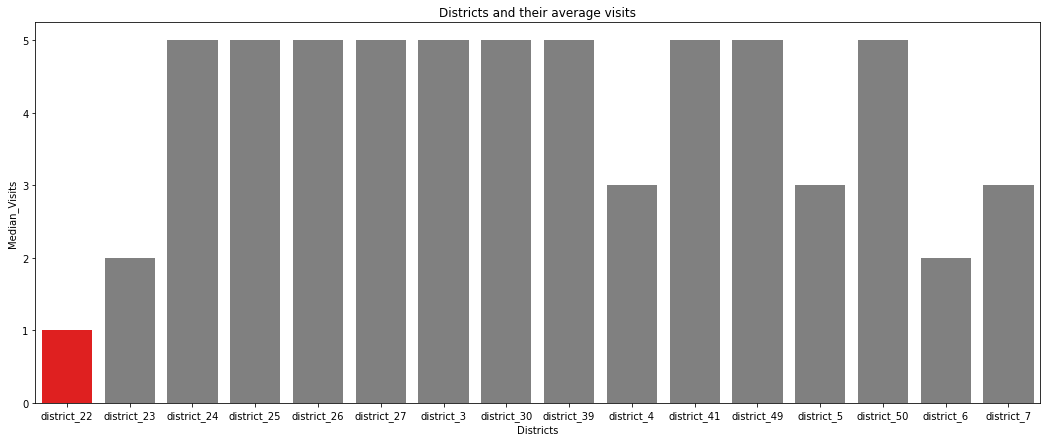

In [244]:
low_dist= pd.DataFrame(dist_counts[dist_counts['Avg_visits']<6])
plt.figure(figsize=(18,7))
clrs = ['red' if (x ==1) else 'grey' for x in low_dist['Avg_visits']]
sns.barplot(low_dist['District'],low_dist['Avg_visits'], palette=clrs)
plt.xlabel('Districts')
plt.ylabel('Median_Visits')
plt.title('Districts and their average visits')
plt.show()

##Observations
#### 1. From the above plot we see that the least number of visits have taken place in district 22
#### 2. Since the number of visits is directly related to the amount of healthcare being received, from the above plot we could conclude that District 22 is receiving the least amount of healthcare wiht an average of 1 visit

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


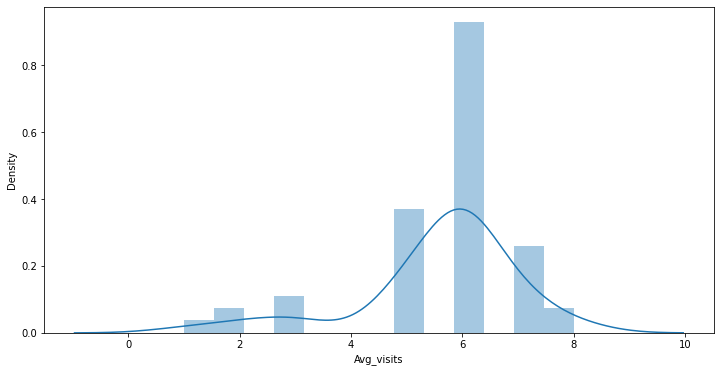

In [267]:
plt.figure(figsize=(12,6))
sns.distplot(dist_counts['Avg_visits'])
plt.show()

In [237]:
num_ben=[]
for u in user_ids:
    num_ben.append(len(users_df[users_df[u]==1]))

72


In [261]:
num_ben_dict= dict(zip(user_ids,num_ben))
max_user= max(num_ben_dict, key= lambda key:num_ben_dict[key])
min_user= min(num_ben_dict, key= lambda key:num_ben_dict[key])
print("{} has the maximum number of Beneficiaries tagged: {}".format(max_user.upper(),num_ben_dict.get(max_user)))
print("{} has the minimum number of Beneficiaries tagged: {}".format(min_user.upper(),num_ben_dict.get(min_user)))
print("The median number of Beneficiaries tagged to a User: {}".format(statistics.median(num_ben)))

USER_38 has the maximum number of Beneficiaries tagged: 706
USER_25 has the minimum number of Beneficiaries tagged: 215
The median number of Beneficiaries tagged to a User: 303.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


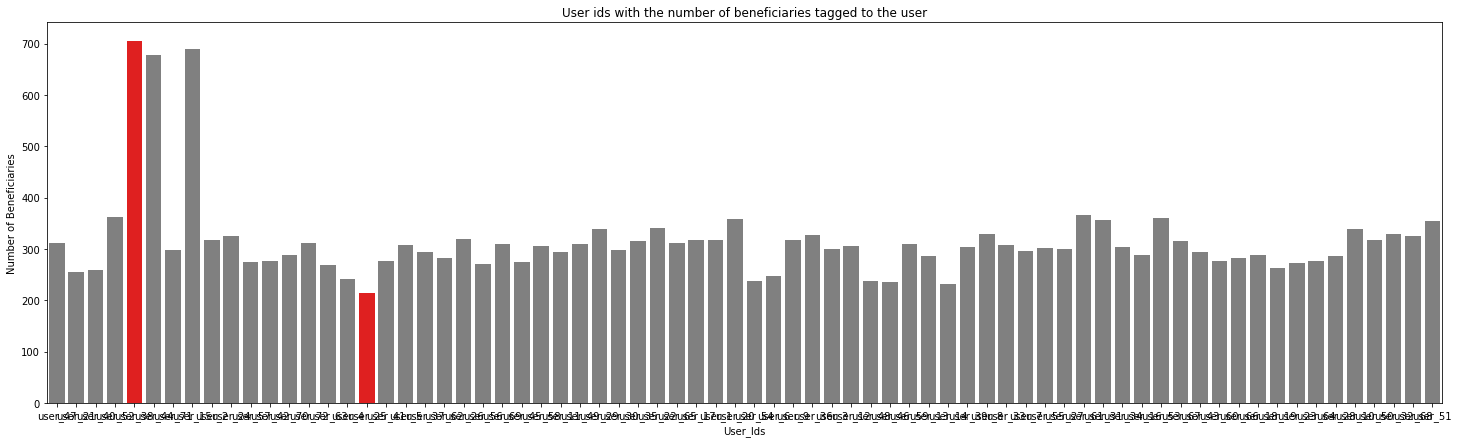

In [260]:
plt.figure(figsize=(25,7))
clrs = ['red' if (x ==num_ben_dict.get(max_user) or x ==num_ben_dict.get(min_user)) else 'grey' for x in num_ben]
sns.barplot(user_ids,num_ben, palette=clrs)
plt.xlabel('User_Ids')
plt.ylabel('Number of Beneficiaries')
plt.title('User ids with the number of beneficiaries tagged to the user')
plt.show()

##Observations
#### 1. From the above plot we see that the 3 users are assigned more number of beneficiaries than any other user on average
#### 2. This could be the reason for lower average number of visits in district 22.

In [275]:
row_sum=[]
for i in total_ben:
    row_sum.append(users_df.loc[i,:].sum(axis=0))
print(np.unique(row_sum))

[1.]


In [278]:
users_df.shape[0]

22701

In [284]:
type_visit= dist_visits.groupby(['Area','Beneficiary','Type']).agg(['count']).reset_index()
type_visit.columns= ['Area','Beneficiary','Type','counts']
type_visit.head()

,Area,Beneficiary,Type,counts
0,district_1,beneficiary_10,Clinic,2
1,district_1,beneficiary_10,Home,4
2,district_1,beneficiary_1002,Clinic,4
3,district_1,beneficiary_1002,Home,1
4,district_1,beneficiary_10095,Clinic,6


In [287]:
print(type_visit['counts'].sum())
type_visit.groupby(['Type'])['counts'].agg(['sum'])

124360


,sum
Type,
Clinic,61819
Home,62541


In [293]:
type_visit2= type_visit.groupby(['Beneficiary','Type']).agg(['sum']).reset_index()
type_visit2.drop(['Beneficiary'],axis=1,inplace= True)
type_visit2.columns=['Type','District','Counts']
type_visit2.head()

,Type,District,Counts
0,Clinic,district_13,4
1,Home,district_13,5
2,Clinic,district_1,2
3,Home,district_1,4
4,Clinic,district_46,4


In [299]:
type_visit3= type_visit2.groupby(['District','Type'])['Counts'].sum()

In [302]:
type_visit3

District     Type  
district_1   Clinic     942
             Home       868
district_10  Clinic     899
             Home       914
district_11  Clinic    1888
                       ... 
district_7   Home       924
district_8   Clinic    1809
             Home      1822
district_9   Clinic    1787
             Home      1840
Name: Counts, Length: 99, dtype: int64